<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by <a href="https://gitlab.com/AkashNarayanan" target="_blank"> Akash Narayanan B</a></td>    
</table>
<hr>

So far we have learned about how to use the Ocean SDK tools. Now let's use those tools to formulate Binary Quadratic Models for some combinatorial optimization problems. In this notebook, we will learn how to formulate BQM for the Maximum Cut problem.

# BQM Formulation of the Maximum Cut Problem

To briefly recall, the goal of the maximum cut problem is to partition a set of vertices of a graph into two disjoint sets such that the number of edges that are cut by the partition is maximized.

The QUBO objective function for a graph with edge set E is 

$$\min \sum_{(i, j) \in E} (-x_i - x_j + 2x_ix_j)$$

The Ising objective function for a graph with edge set E is

$$\min \sum_{(i, j) \in E} s_i s_j$$

`dwave-networkx` package in the Ocean SDK has implementations of graph-theory algorithms for some combinatorial optimization problems like Maximum Cut, Graph Colouring, Traveling Salesman, etc. You can find out more details about the available algorithms [here](https://docs.ocean.dwavesys.com/en/stable/docs_dnx/reference/algorithms/index.html).

There are two implemented algorithms `maximum_cut` and `weighted_maximum_cut` for solving the Maximum Cut problem.

We can either use these already implemented algorithms or solve by formulating the problem as a QUBO or Ising from scratch. We will look at both the ways this problem can be solved.

# Built-in Algorithm

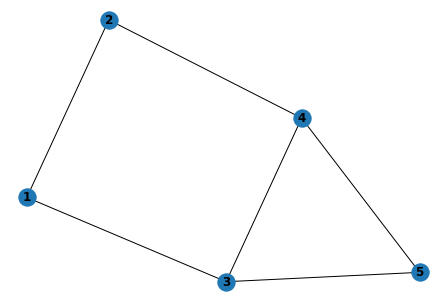

In [1]:
import networkx as nx

G = nx.Graph([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])

nx.draw(G, with_labels=True, font_weight='bold')

In [2]:
import dimod
from dimod.reference.samplers import ExactSolver

import dwave_networkx as dnx

sampler = ExactSolver()

cut = dnx.maximum_cut(G, sampler)

print(cut)

{2, 3, 5}


# Formulating QUBO from Scratch

<div class="alert alert-block alert-danger">
The below code snippet is from D-Wave's GitHub repository. This is put here for the sake of discussion during the meeting. It will be replaced with some other example later on.
</div>

{1: Text(0.4986071970147682, -0.8228557092053277, '1'),
 2: Text(0.9627888202922661, 0.0423975043691252, '2'),
 3: Text(-0.44621718680399874, -0.2791045872222114, '3'),
 4: Text(-0.015178830503034759, 0.5248192809959562, '4'),
 5: Text(-1.0, 0.5347435110624581, '5')}

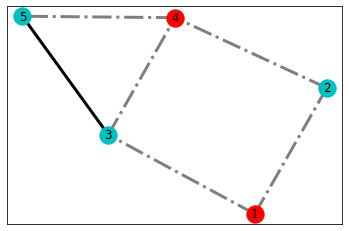

In [3]:
from collections import defaultdict

import networkx as nx
from dimod.reference.samplers import ExactSolver


import matplotlib
matplotlib.use("agg")
from matplotlib import pyplot as plt

# ------- Set up our graph -------

# Create empty graph
G = nx.Graph()

# Add edges to the graph (also adds nodes)
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])

# ------- Set up our QUBO dictionary -------

# Initialize our Q matrix
Q = defaultdict(int)

# Update Q matrix for every edge in the graph
for i, j in G.edges:
    Q[(i,i)]+= -1
    Q[(j,j)]+= -1
    Q[(i,j)]+= 2

sampler = ExactSolver()
response = sampler.sample_qubo(Q)
lut = response.first.sample

# Interpret best result in terms of nodes and edges
S0 = [node for node in G.nodes if not lut[node]]
S1 = [node for node in G.nodes if lut[node]]
cut_edges = [(u, v) for u, v in G.edges if lut[u]!=lut[v]]
uncut_edges = [(u, v) for u, v in G.edges if lut[u]==lut[v]]

# Display best result
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color='c')
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, style='dashdot', alpha=0.5, width=3)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)
nx.draw_networkx_labels(G, pos)